In [11]:
import numpy as np
import matplotlib.pyplot as plt
text_path="Apna Time Aayega.txt"

In [12]:
def load_text(filename):
    with open(filename,encoding='utf8') as f:
        return f.read()
text=load_text(text_path)
text=text.replace("\n"," ")
text

'Apna Time Aayega Uth ja apni raakh se Tu udd ja ab talaash mein Parwaaz dekh parwane ki Aasman bhi sar uthayega Aayega apna time aayega Mere jaisa shaana lala Tujhe na mil payega   Yeh shabdon ka jwala Meri bediyan pighlayega Jitna toone boya hai tu Utna hi to khaayega Aisa mera khwaab hai Jo darr ko bhi satayega Zinda mera khwaab Ab kaise tu dafnayega   Ab hausle se jeene de Ab khauf nahi hai seene mein Har raaste ko cheerenge Hum kaamyabi chheenenge Sab kuchh mila paseene se Matlab bana ab jeene mein   Kyon Kyon ki apna time aayega   Tu nanga hi to aaya hai Kya ghanta lekar jaayega Apna time aayega Apna time aayega Apna time aayega x (2)   Tu nanga hi to aaya hai Kya ghanta lekar..   Kissi ka hath nahi tha sar par Yahaan par aaya khud ki mehnat se main Jitni taakat kismat mein nahi Utni rehmat mein hai Phir bhi ladka sehmat nahin hai Kyon ki hairat nahi hai Zaroorat yahaan marzi ki Aur jurrat ki hai   Taakat ki hai, aafat ki Himaakat ki, ibaadat ki Adalat yeh hai chahat ki Mohobbat 

In [13]:
def generatetable(text,k=4):
    T={}
    for i in range(len(text)-k):
        x=text[i:i+k]
        y=text[i+k]
        if T.get(x) is None:
            T[x]={}
            T[x][y]=1
        else:
            if T[x].get(y) is None:
                T[x][y]=1
            else:
                T[x][y]+=1
    return T

            
T=generatetable(text,k=6)    

In [14]:
def convertfreqtoprob(T):
    for kx in T.keys():
        s=float(sum(T[kx].values()))
        for k in T[kx].keys():
            T[kx][k]=T[kx][k]/s
    return T
T=convertfreqtoprob(T)


In [15]:
def trainmarkovchain(text,k=4):
    T=generatetable(text,k=4)
    T=convertfreqtoprob(T)
    return T
T=trainmarkovchain(text,k=4)

In [16]:
def sample_next(ctx,T,k=4):
    ctx=ctx[-k:]
    if T.get(ctx) is None:
        return " "
    possible_chars=list(T[ctx].keys())
    possible_values=list(T[ctx].values())
    return np.random.choice(possible_chars,p=possible_values)

    

def generatetext(starting_sent,k=4,maxlen=1000):
    sentence=starting_sent
    ctx=sentence[-k:]
    for ix in range (maxlen):
        sentence+=sample_next(ctx,T,k=4)
        ctx=sentence[-k:]
    return sentence
    

In [17]:
def generatetext(starting_sent,k=4,maxlen=1000):
    sentence=starting_sent
    ctx=sentence[-k:]
    for ix in range(maxlen):
        next_prediction=sample_next(ctx,T,k=4,)
        sentence+=next_prediction
        ctx=sentence[-k:]
    return sentence
lyrics=generatetext("apna",k=4,maxlen=1000)


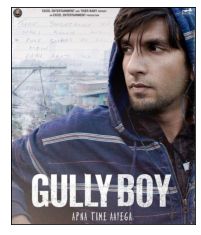

In [25]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
a=plt.imshow(mpimg.imread('apnatimeayega.jpg'))
a.axes.get_xaxis().set_visible(False)
a.axes.get_yaxis().set_visible(False)

# generated lyrics of Apna Time Ayega:


In [26]:
lyrics

'apna time aayega apna time aayega Aayega Apna time aayega Apna time aayega Apna toone boya hai jaisa koyi hai tu dafnayega Apna toone boya hath nai hai jaisa shabdon ki Aur jurrat ki Jeetne ki ab aadat ki hai Kyon ka hai Tere bhai Jo darr ko bhi sar parwane ki hai Kya tu ghanta lekar jaayega Apna toone boya hai chheene se main Jitna time aaya hath nai hai Zaroorat nahi hairat nahi Utni raakh se jeene mein hai Kyon ki apna time aayega   Tu udd ja ab aadat ki Aasman bhi sar uthayega Apna toone boya hai Kya tu ghanta lekar..   Kyon Kyon?   Tu nanga hi to khaayega Apna time aaya hai Kyon Kyon?   Tu nanga hi to aaya hai Phir bhi ladka sehmat mein hai jaisa mera khwaab hai Shohrat ne hi barkat ki hai   Iss harkat nahi hai Kya ghanta lekar jaayega   Yeh shaan par Yahaan parwane ki Jeetne ki Adalat yahaana lala Mere jaisa mera khwaab hai Tere jaisa koyi hai jaisa koyi hai chahat ki ab laalach nai hai Kyon ki hard’ch nahi tha sar parwane ki Himaakat ki Himaakat ki Aur jurrat yeh hai Zaroorat n